In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, ifftshift, fftshift

In [2]:
# Check numerically that Gaussians form a closed set with respect to the Fourier transform
# # Parameters
N = 1024 # number of grid points
Dx = 0.1 # spacing of the x grid
x = Dx*np.arange(-N//2,N//2) # grid in x space
L = N*Dx # truncation limit in x space
Dxi = 2*np.pi/L # spacing of the xi grid; Nyquist relation: Dx*Dxi = 2*pi/N
xi = Dxi*np.arange(-N//2,N//2) # grid in xi space
W = N*Dxi # truncation limit in xi space; W = 2*pi/Dx

# Gaussian Parameters
a = 2

# Analytical
fa = np.sqrt(a/np.pi)*np.exp(-a*x**2) # Gaussian in x space
Fa = np.exp(-xi**2/(4*a)) # Gaussian in xi space
# or Fa = sqrt(pi/a)*exp(-xi.^2/(4*a)) as in lecture and remove sqrt from fa

# Numerical
Fn  = fftshift(ifft(ifftshift(fa)))*L #inverse - could also use /N instead of L
fn  = fftshift(fft(ifftshift(Fa)))/L #forward
#^^ always works, 
Fn1 = fftshift(fft(ifftshift(fa)))*Dx
fn1 = fftshift(ifft(ifftshift(Fa)))/Dx
#^^ only works for this case

#Both fftshift and ifftshift are often used in signal processing and are
#applied to shift the zero-frequency component of a discrete Fourier 
#transform (DFT) or an inverse discrete Fourier transform (IDFT) to the 
#center of the array.

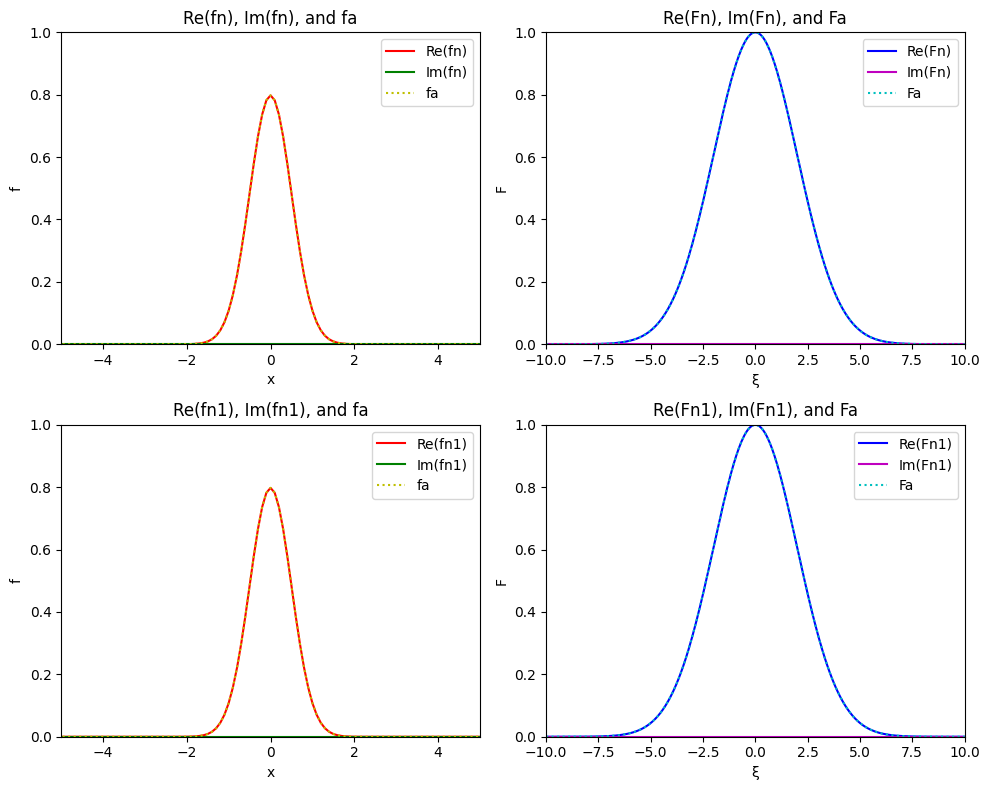

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x, np.real(fn), 'r', label='Re(fn)')
axs[0, 0].plot(x, np.imag(fn), 'g', label='Im(fn)')
axs[0, 0].plot(x, fa, 'y:', label='fa')
axs[0, 0].axis([-5, 5, 0, 1])
axs[0, 0].set(xlabel='x', ylabel='f')
axs[0, 0].legend()
axs[0, 0].set_title('Re(fn), Im(fn), and fa')

axs[0, 1].plot(xi, np.real(Fn), 'b', label='Re(Fn)')
axs[0, 1].plot(xi, np.imag(Fn), 'm', label='Im(Fn)')
axs[0, 1].plot(xi, Fa, 'c:', label='Fa')
axs[0, 1].axis([-10, 10, 0, 1])
axs[0, 1].set(xlabel='\u03BE', ylabel='F')
axs[0, 1].legend()
axs[0, 1].set_title('Re(Fn), Im(Fn), and Fa')

axs[1, 0].plot(x, np.real(fn1), 'r', label='Re(fn1)')
axs[1, 0].plot(x, np.imag(fn1), 'g', label='Im(fn1)')
axs[1, 0].plot(x, fa, 'y:', label='fa')
axs[1, 0].axis([-5, 5, 0, 1])
axs[1, 0].set(xlabel='x', ylabel='f')
axs[1, 0].legend()
axs[1, 0].set_title('Re(fn1), Im(fn1), and fa')

axs[1, 1].plot(xi, np.real(Fn1), 'b', label='Re(Fn1)')
axs[1, 1].plot(xi, np.imag(Fn1), 'm', label='Im(Fn1)')
axs[1, 1].plot(xi, Fa, 'c:', label='Fa')
axs[1, 1].axis([-10, 10, 0, 1])
axs[1, 1].set(xlabel='\u03BE', ylabel='F')
axs[1, 1].legend()
axs[1, 1].set_title('Re(Fn1), Im(Fn1), and Fa')

# Adjust layout
plt.tight_layout()